# **Results**

### **Import libraries**

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, spearmanr
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [ ]:
# Loading data
from google.colab import drive
drive.mount('/content/drive/')
# Specifying paths to data
df = pd.read_csv(r"/content/drive/MyDrive/weatherAUS.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df = pd.read_csv(r"/Users/nargiza/Downloads/weatherAUS.csv")
df.head()

In [ ]:
import pandas as pd
import numpy as np
from bamt.networks.hybrid_bn import HybridBN
from sklearn import preprocessing as pp
import bamt.preprocessors as preprocessor
from pgmpy.estimators import K2Score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

encoder = pp.LabelEncoder()
p1 = preprocessor.Preprocessor([("encoder", encoder)])
df = df.dropna()
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1}, na_action='ignore')

df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}, na_action='ignore')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.reset_index(inplace=True, drop=True)
df.drop('Date', axis=1, inplace = True)
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df[categorical_columns], est=p1.apply(df[categorical_columns])





2024-12-11 16:40:06,732 | INFO     | preprocessors.py-scan-0099 | No one column is continuous


<Axes: xlabel='RainTomorrow', ylabel='count'>

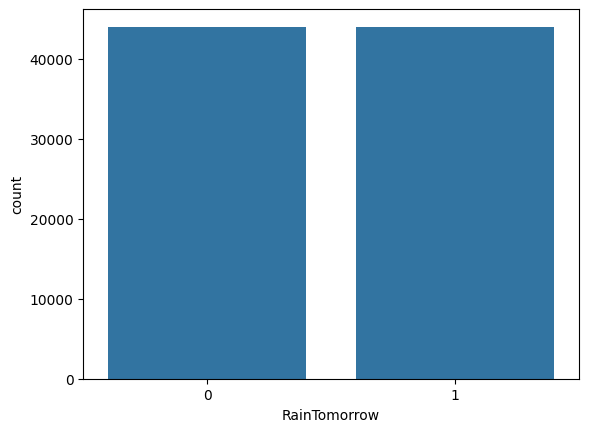

In [ ]:
yes = df[df['RainTomorrow'] == 1]
no = df[df['RainTomorrow'] == 0]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])
sns.countplot(df, x='RainTomorrow')

### **Outlier Detection and Treatment**

In [ ]:
def remove_outliers_iqr(df):
    cont_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

    for column in df.columns:
      if column in cont_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [ ]:
# For choosing a method of transforming outliers
cont_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

lever = 0 # We've tried both methods and have chosen the best one :)

if (lever == 1):
  df = remove_outliers_iqr(df)
  print("DataFrame after removing outliers using IQR:")
  print(df)

else:
  for i in df[cont_cols].columns:
    df[i] = winsorize(df[i], limits=[0.05, 0.05])
  df.reset_index(drop=True)

### **Variable Transformation**

In [ ]:
# Logarithmic Transformation
def log_transform(column):
    if np.any(column <= 0):
        raise ValueError("All values must be positive for logarithmic transformation")
    return np.log(column)

# Square Root Transformation
def sqrt_transform(column):
    return np.sqrt(column)

# Box-Cox Transformation
def box_cox_transform(column):
    if np.any(column <= 0):
        raise ValueError("All values must be positive for the Box-Cox transformation")
    transformed_data, _ = stats.boxcox(column)
    return transformed_data
# Yeo-Johnson Transformation
def yeo_johnson_transform(column):
    transformed_data, _ = stats.yeojohnson(column)
    return transformed_data

In [ ]:
# Select a Transformation Method
def select_transform(column):
    if np.all(column > 0):
        skewness = stats.skew(column)
        if abs(skewness) > 1:
            return box_cox_transform
        else:
            return log_transform
    elif np.all(column >= 0):
        return sqrt_transform
    else:
        return yeo_johnson_transform # this one can deal with negative values

In [ ]:
# Processing Data
def process_dataset(dataset, method='iqr', threshold=3):
    transformed_dataset = dataset.copy()
    for column in dataset.select_dtypes(include=[np.number]).columns:
            transform_func = select_transform(dataset[column])
            if transform_func:
                try:
                    transformed_column = transform_func(dataset[column])
                    transformed_dataset[column] = transformed_column
                    print(f"Column '{column}' is transformed using {transform_func.__name__}")
                except ValueError as e:
                    print(f"Error in column transformation '{column}': {str(e)}")
            else:
                print(f"A suitable transformation for the column '{column}' is not found")
    return transformed_dataset

In [ ]:
# Processing the dataset
df[cont_cols] = process_dataset(df[cont_cols])

Column 'MinTemp' is transformed using log_transform
Column 'MaxTemp' is transformed using log_transform
Column 'Rainfall' is transformed using sqrt_transform
Column 'Evaporation' is transformed using log_transform
Column 'Sunshine' is transformed using sqrt_transform
Column 'WindGustSpeed' is transformed using log_transform
Column 'WindSpeed9am' is transformed using log_transform
Column 'WindSpeed3pm' is transformed using log_transform
Column 'Humidity9am' is transformed using log_transform
Column 'Humidity3pm' is transformed using log_transform
Column 'Pressure9am' is transformed using log_transform
Column 'Pressure3pm' is transformed using log_transform
Column 'Cloud9am' is transformed using sqrt_transform
Column 'Cloud3pm' is transformed using log_transform
Column 'Temp9am' is transformed using log_transform
Column 'Temp3pm' is transformed using log_transform


### **Feature Scaling**

In [ ]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
# Fit and transform the data
df[cont_cols] = scaler.fit_transform(df[cont_cols])

### **Noise Removal**

In [ ]:
df[cont_cols] = df[cont_cols].rolling(window=3).mean()

In [ ]:
df=df.dropna()

##**Feature interaction generation**

In [ ]:
import pandas as pd
from itertools import combinations

def generate_feature_interactions(df, interaction_only=True):
    feature_interactions = [
    ["MinTemp", "Humidity9am"],
    ["MaxTemp", "Humidity3pm"],
    ["Temp9am", "Humidity9am"],
    ["Temp3pm", "Humidity3pm"],
    ["Pressure9am", "WindSpeed9am"],
    ["Pressure3pm", "WindSpeed3pm"],
    ["Cloud9am", "Sunshine"],
    ["Cloud3pm", "Sunshine"],
    ["MinTemp", "Pressure9am"],
    ["MaxTemp", "Pressure3pm"],
    ["Humidity9am", "Cloud9am"],
    ["Humidity3pm", "Cloud3pm"],
    ["WindSpeed9am", "WindDir9am"],
    ["WindSpeed3pm", "WindDir3pm"],
    ["Evaporation", "Rainfall"],
    ["Month", "MinTemp"],
    ["Month", "MaxTemp"],
    ["Month", "Rainfall"],
]
    interaction_df = df.copy()

    # Генерация попарных взаимодействий
    for col1, col2 in feature_interactions:
        interaction_name = f"{col1}_x_{col2}"
        interaction_df[interaction_name] = df[col1] * df[col2]

    return interaction_df
interaction_df=generate_feature_interactions(df)

In [ ]:
interaction_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,MinTemp_x_Pressure9am,MaxTemp_x_Pressure3pm,Humidity9am_x_Cloud9am,Humidity3pm_x_Cloud3pm,WindSpeed9am_x_WindDir9am,WindSpeed3pm_x_WindDir3pm,Evaporation_x_Rainfall,Month_x_MinTemp,Month_x_MaxTemp,Month_x_Rainfall
2,4,0.849049,0.937903,0.000000,0.990282,0.973511,5,0.553229,5,6,...,0.216682,0.245157,0.021079,0.022505,2.803222,3.492512,0.000000,0.849049,0.937903,0.000000
3,4,0.885043,0.937903,0.000000,0.987916,0.972159,14,0.417082,14,15,...,0.307440,0.309507,0.021814,0.045010,7.849022,5.469825,0.000000,0.885043,0.937903,0.000000
4,4,0.933944,1.000000,0.000000,0.983144,0.913177,14,0.399777,7,14,...,0.294904,0.261592,0.021814,0.068722,3.766478,4.004816,0.000000,0.933944,1.000000,0.000000
5,4,0.976326,1.000000,0.000000,0.992862,0.604986,3,0.378776,3,14,...,0.243642,0.235356,0.005299,0.046035,0.728038,4.838969,0.000000,0.976326,1.000000,0.000000
6,4,0.987385,0.993081,0.000000,0.972295,0.607685,11,0.465839,8,10,...,0.226543,0.245294,0.000000,0.006902,3.632559,5.524476,0.000000,0.987385,0.993081,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38500,12,0.394692,0.172488,0.190421,0.427600,0.372081,15,0.543960,13,15,...,0.118951,0.067205,0.659171,0.917518,8.367517,6.409929,0.081424,1.973462,0.862438,0.952103
16013,18,0.159428,0.054539,0.190421,0.188534,0.421346,13,0.595501,7,13,...,0.041154,0.016248,0.799238,0.881576,4.139254,8.885195,0.035901,0.956569,0.327236,1.142523
44099,16,0.195242,0.225190,0.104828,0.094267,0.484030,3,0.799132,5,3,...,0.068273,0.070030,0.575947,0.749236,3.475037,2.438239,0.009882,1.171450,1.351138,0.628971
16363,18,0.317116,0.212376,0.110499,0.094267,0.353550,2,0.749424,8,9,...,0.171115,0.110236,0.619373,0.774603,3.837405,7.011780,0.010416,2.219812,1.486634,0.773492


##**Feature selection**

Оптимальное количество признаков: 20
Оптимальные признаки: MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Month', 'MaxTemp_x_Humidity3pm', 'Temp9am_x_Humidity9am', 'Temp3pm_x_Humidity3pm', 'Cloud9am_x_Sunshine', 'Cloud3pm_x_Sunshine', 'MaxTemp_x_Pressure3pm', 'Humidity9am_x_Cloud9am', 'Month_x_MinTemp


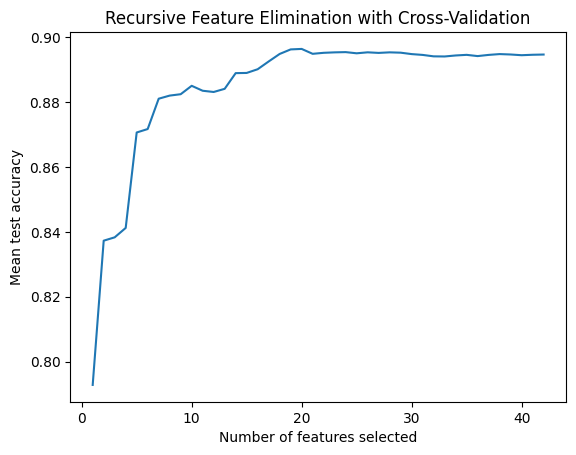

In [ ]:
import numpy as np
from sklearn.utils import resample
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Сохраняем имена столбцов перед преобразованием в массив
feature_names = interaction_df.drop('RainTomorrow', axis=1).columns

X = interaction_df.drop('RainTomorrow', axis=1).values
y = interaction_df['RainTomorrow'].values
X = pd.DataFrame(X, columns=feature_names)

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Настройка RFECV
min_features_to_select = 1
clf = LogisticRegression(max_iter=1000, random_state=42)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_scaled, y)

# Вывод результатов с именами признаков
optimal_features = feature_names[rfecv.support_].tolist()
print(f"Оптимальное количество признаков: {rfecv.n_features_}")
print("Оптимальные признаки:", "', '".join(optimal_features))

# Построение графика
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score']
)
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = interaction_df[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Month', 'MaxTemp_x_Humidity3pm', 'Temp9am_x_Humidity9am', 'Temp3pm_x_Humidity3pm', 'Cloud9am_x_Sunshine', 'Cloud3pm_x_Sunshine', 'MaxTemp_x_Pressure3pm', 'Humidity9am_x_Cloud9am', 'Month_x_MinTemp']].values
y = interaction_df['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_interaction_df = LogisticRegression(max_iter = 1000)
model_interaction_df.fit(X_train, y_train)
y_pred_interaction_df = model_interaction_df.predict(X_test)
print("\nРезультаты классификации:")
print(classification_report(y_test, y_pred_interaction_df))
y_pred_interaction_df = model_interaction_df.predict(X_test)
accuracy_interaction_df = accuracy_score(y_test, y_pred_interaction_df)
f1_interaction_df = f1_score(y_test, y_pred_interaction_df)
roc_auc_interaction_df = roc_auc_score(y_test, y_pred_interaction_df)

print('Accuracy = ', accuracy_interaction_df)
print('F-1 Score = ', f1_interaction_df)
print('ROC-AUC = ', roc_auc_interaction_df)

##**UMAP**

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00


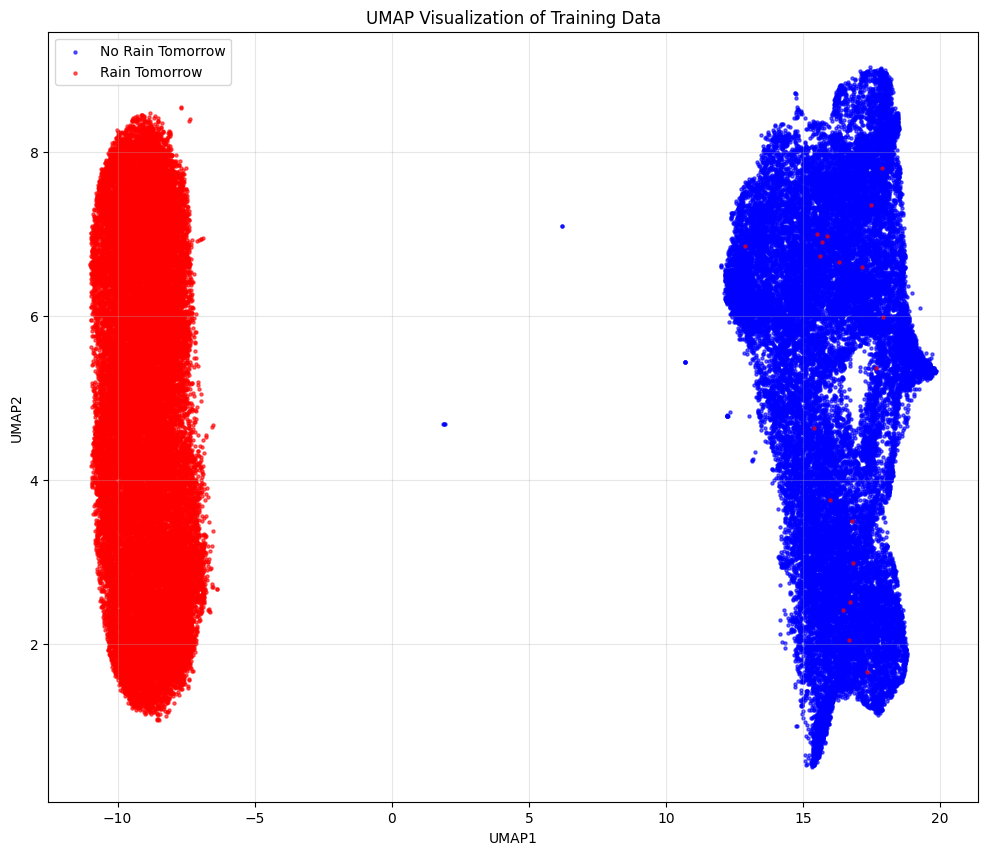

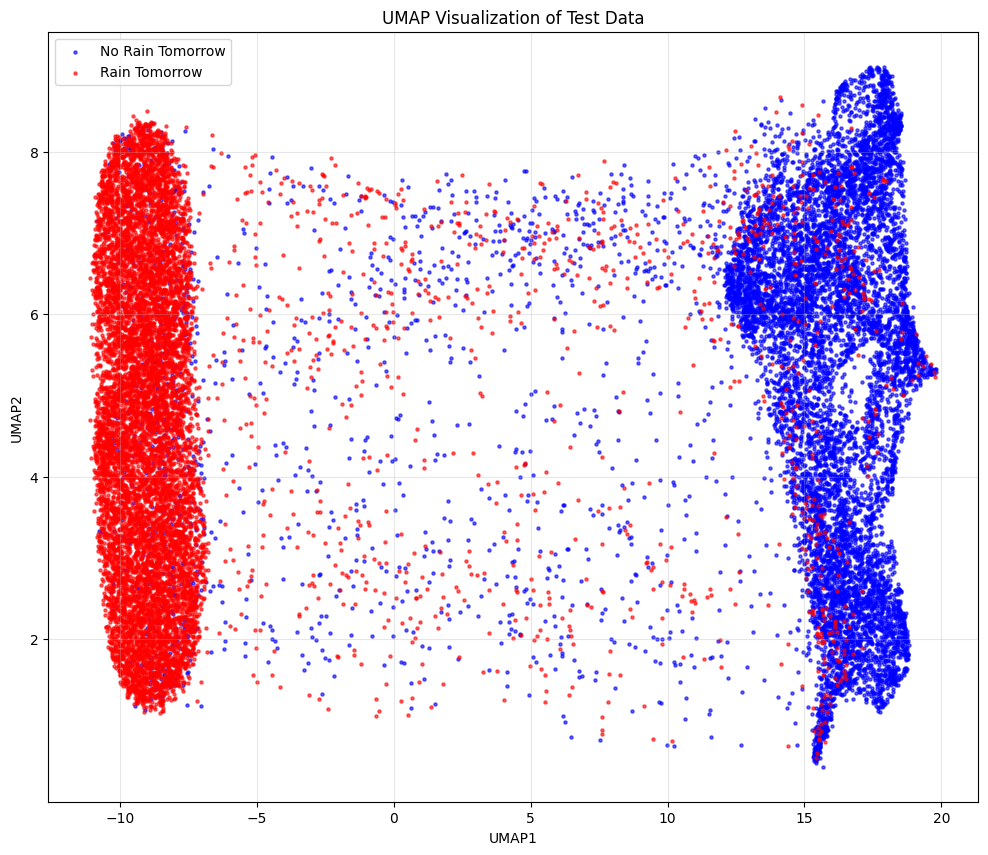


Метрики качества модели:
Accuracy: 0.924
F1-score: 0.925
ROC AUC: 0.924

Полный отчет:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     11045
           1       0.91      0.94      0.93     10951

    accuracy                           0.92     21996
   macro avg       0.92      0.92      0.92     21996
weighted avg       0.92      0.92      0.92     21996



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# Разделение данных
X = interaction_df[['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Month', 'MaxTemp_x_Humidity3pm', 'Temp9am_x_Humidity9am', 'Temp3pm_x_Humidity3pm', 'Cloud9am_x_Sunshine', 'Cloud3pm_x_Sunshine', 'MaxTemp_x_Pressure3pm', 'Humidity9am_x_Cloud9am', 'Month_x_MinTemp']].values
y = interaction_df['RainTomorrow'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Предобработка данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка и обучение supervised UMAP
mapper = umap.UMAP(
    n_components=2,
    n_neighbors=50,
    min_dist=0.1,
    metric='cosine',
    random_state=42,
    n_epochs=200,
    transform_queue_size=4.0
)

# Обучаем UMAP на тренировочных данных с метками классов
X_train_umap = mapper.fit_transform(X_train_scaled, y_train)

# Трансформируем тестовые данные
X_test_umap = mapper.transform(X_test_scaled)

# Визуализация обучающих данных
plt.figure(figsize=(12, 10))
plt.scatter(X_train_umap[y_train == 0, 0], X_train_umap[y_train == 0, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_train_umap[y_train == 1, 0], X_train_umap[y_train == 1, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)
plt.title('UMAP Visualization of Training Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Дополнительная визуализация результатов на тестовых данных
plt.figure(figsize=(12, 10))
rain_tomorrow_test = y_test == 1
no_rain_tomorrow_test = y_test == 0

plt.scatter(X_test_umap[no_rain_tomorrow_test, 0], X_test_umap[no_rain_tomorrow_test, 1],
           c='blue', label='No Rain Tomorrow', alpha=0.6, s=5)
plt.scatter(X_test_umap[rain_tomorrow_test, 0], X_test_umap[rain_tomorrow_test, 1],
           c='red', label='Rain Tomorrow', alpha=0.6, s=5)

plt.title('UMAP Visualization of Test Data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Обучение логистической регрессии
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_umap, y_train)

# Предсказания и оценка качества
y_pred = lr_model.predict(X_test_umap)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("\nМетрики качества модели:")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {roc_auc:.3f}")
print("\nПолный отчет:")
print(classification_report(y_test, y_pred))

# **Conclusion**

According to the results of this experimental study, it is crucial to apply both univariate and multivariate methods of data analysis and processing. The comparison of baseline and improved model metrics demonstrates the effectiveness of combining these approaches:

```
Model           Accuracy      F1 Score 	ROC-AUC
Baseline	    0.858	     0.631	    0.747
Univariate      0.897         0.897        0.897
Multivariate    0.795         0.806        0.796
Combivariate	0.924    	 0.925	    0.924
```

The combivariate approach showed impressive improvements over the baseline:
- Accuracy increased by 6.6%
- F1 Score improved by 29.4%
- ROC-AUC enhanced by 17.7%

These results highlight the importance of a **comprehensive approach** to data analysis and preprocessing, leveraging both univariate and multivariate techniques to extract the most value from the dataset and achieve superior predictive performance.